In [52]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd
import plotly.express as px


In [53]:
sicaklik_reel = pd.read_csv('BItooldata/sicaklik_emisyon_reel.csv')


In [54]:
sicaklik_reel

,Unnamed: 0,sicaklik,year,total_ghg,Tarih,tavg
0,0,14.440417,1938,5.0,1938-01-01,14.262500
1,1,14.525833,1939,5.0,1939-01-01,14.675000
2,2,14.405417,1940,5.0,1940-01-01,13.516667
3,3,14.350417,1941,6.0,1941-01-01,13.720833
4,4,14.155000,1942,5.0,1942-01-01,13.045833
...,...,...,...,...,...,...
79,79,15.821405,2017,472.0,2017-01-01,15.925000
80,80,15.928299,2018,471.0,2018-01-01,17.127273
81,81,16.007465,2019,460.0,2019-01-01,16.766667
82,82,15.984965,2020,413.0,2020-01-01,16.266667


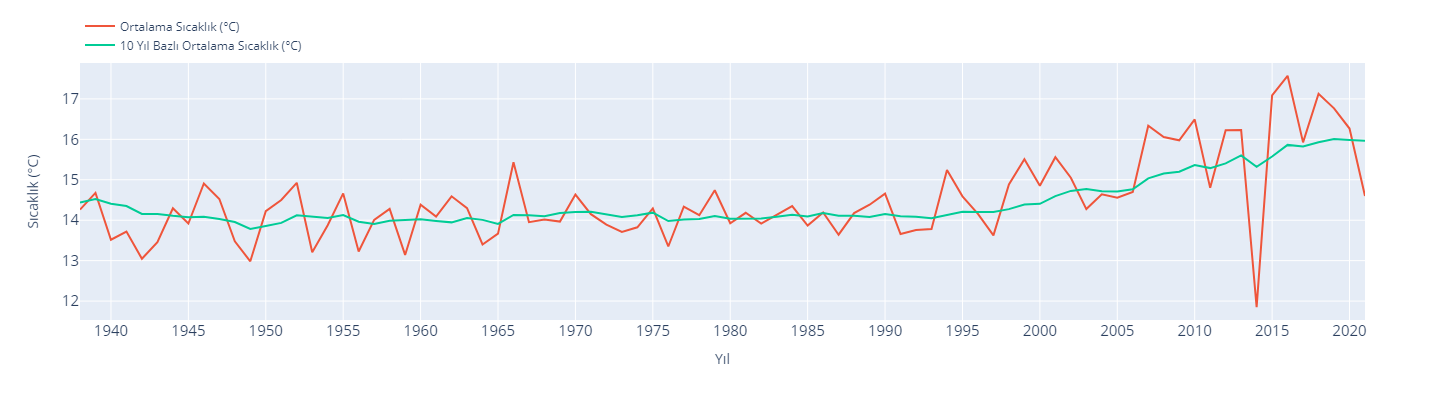

In [55]:

# İlk çizgiyi çizin
fig = px.line()

# İkinci çizgiyi çizin ve mevcut grafiğe ekleyin
fig.add_scatter(x=sicaklik_reel['year'], y=sicaklik_reel['tavg'], mode='lines', name='Ortalama Sıcaklık (°C)')
fig.add_scatter(x=sicaklik_reel['year'], y=sicaklik_reel['sicaklik'], mode='lines', name='10 Yıl Bazlı Ortalama Sıcaklık (°C)')

# Grafiği özelleştir
fig.update_layout(
    width=800,   # Genişlik
    height=400,  # Yükseklik
    xaxis_title="Yıl",  # X ekseni başlığı
    yaxis_title="Sıcaklık (°C)",  # Y ekseni başlığı
    title_font=dict(size=30),  # Başlık font boyutu
    xaxis=dict(tickfont=dict(size=15), dtick=5),  # X ekseni etiket font boyutu ve daha sık yıl gösterimi
    yaxis=dict(tickfont=dict(size=15), dtick=1),  # Y ekseni etiket font boyutu ve daha sık sıcaklık gösterimi
    legend=dict(font=dict(size=12), x=0, y=1.2),  # Legend font boyutu ve üst orta konum
)

# Grafiği göster
fig.show()


In [76]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Sıcaklık Grafiği"),
    dcc.Graph(id='temperature-plot'),
    dcc.RangeSlider(
        id='year-slider',
        min=sicaklik_reel['year'].min(),
        max=sicaklik_reel['year'].max(),
        step=1,  # Set the step value to control the number of marks
        marks={str(year): str(year) for year in sicaklik_reel['year'] if year % 5 == 0},  # Display marks for every 5 years
        value=[sicaklik_reel['year'].min(), sicaklik_reel['year'].max()],
    ),
    dcc.Checklist(
        id='average-temperature-checkbox',
        options=[
            {'label': 'Ortalama Sıcaklık Göster', 'value': 'show-average-temperature'}
        ],
        value=['show-average-temperature']
    )
])

# Define the callback to update the plot based on the selected years and checkbox state
@app.callback(
    Output('temperature-plot', 'figure'),
    [Input('year-slider', 'value'),
     Input('average-temperature-checkbox', 'value')]
)
def update_plot(selected_years, checkbox_value):
    filtered_data = sicaklik_reel[(sicaklik_reel['year'] >= selected_years[0]) & (sicaklik_reel['year'] <= selected_years[1])]

    fig = go.Figure()
    
    if 'show-average-temperature' in checkbox_value:
        fig.add_trace(go.Scatter(x=filtered_data['year'], y=filtered_data['tavg'], mode='lines', name='Ortalama Sıcaklık (°C)'))
    
    fig.add_trace(go.Scatter(x=filtered_data['year'], y=filtered_data['sicaklik'], mode='lines', name='10 Yıl Bazlı Ortalama Sıcaklık (°C)'))

    fig.update_layout(
        height=600,
        xaxis_title="Yıl",
        yaxis_title="Sıcaklık (°C)",
        title_font=dict(size=30),
        xaxis=dict(tickfont=dict(size=15), dtick=5),
        yaxis=dict(tickfont=dict(size=15), dtick=1),
        legend=dict(font=dict(size=12), x=0, y=1.2),
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [79]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Sıcaklık Grafiği"),
    dcc.Graph(id='temperature-plot'),
    dcc.RangeSlider(
        id='year-slider',
        min=sicaklik_reel['year'].min(),
        max=sicaklik_reel['year'].max(),
        step=1,
        marks={str(year): str(year) for year in sicaklik_reel['year'] if year % 5 == 0},
        value=[sicaklik_reel['year'].min(), sicaklik_reel['year'].max()],
    ),
    dcc.Checklist(
        id='average-temperature-checkbox',
        options=[
            {'label': 'Ortalama Sıcaklık Göster', 'value': 'show-average-temperature'}
        ],
        value=['show-average-temperature']
    ),
    dcc.Checklist(
        id='emission-checkbox',
        options=[
            {'label': 'Emisyon Verilerini Göster', 'value': 'show-emission'}
        ],
        value=['show-emission']
    )
])

# Define the callback to update the plot based on the selected years and checkbox state
@app.callback(
    Output('temperature-plot', 'figure'),
    [Input('year-slider', 'value'),
     Input('average-temperature-checkbox', 'value'),
     Input('emission-checkbox', 'value')]
)
def update_plot(selected_years, avg_temp_checkbox_value, emission_checkbox_value):
    filtered_data = sicaklik_reel[(sicaklik_reel['year'] >= selected_years[0]) & (sicaklik_reel['year'] <= selected_years[1])]

    fig = go.Figure()

    if 'show-average-temperature' in avg_temp_checkbox_value:
        fig.add_trace(go.Scatter(x=filtered_data['year'], y=filtered_data['tavg'], mode='lines', name='Ortalama Sıcaklık (°C)', yaxis='y2', line=dict(color='blue')))
    
    if 'show-emission' in emission_checkbox_value:
        fig.add_trace(go.Scatter(x=filtered_data['year'], y=filtered_data['total_ghg'], mode='lines', name='Toplam Emisyon Oranı', yaxis='y3', line=dict(color='black')))
    
    fig.add_trace(go.Scatter(x=filtered_data['year'], y=filtered_data['sicaklik'], mode='lines', name='10 Yıl Bazlı Ortalama Sıcaklık (°C)', line=dict(color='red')))

    fig.update_layout(
        height=600,
        xaxis_title="Yıl",
        yaxis_title="Sıcaklık (°C)",
        title_font=dict(size=30),
        xaxis=dict(tickfont=dict(size=15), dtick=5),
        yaxis=dict(tickfont=dict(size=15), dtick=1),
        yaxis2=dict(tickfont=dict(size=15), overlaying='y', side='right'),  # Secondary Y-axis for average temperature
        yaxis3=dict(tickfont=dict(size=15), overlaying='y', side='right', anchor='x', position=0.9),  # Secondary Y-axis for emissions
        legend=dict(font=dict(size=12), x=0, y=1.2),
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
